In [47]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
%matplotlib inline

In [74]:
def displayImage(image, shiftColor=True, figSize=(8,8), title=None):
    fig = plt.figure(figsize=figSize)
    plt.axis("off")
    if shiftColor:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='Greys_r',  interpolation='bicubic')
    if title is not None:
        plt.title(title)
    plt.show()

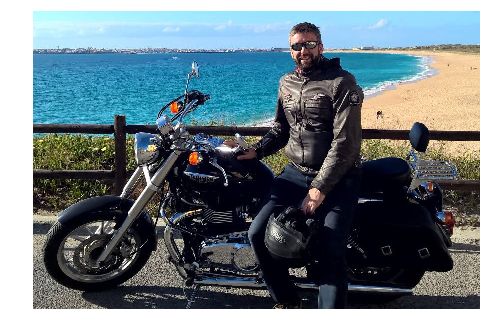

In [49]:
#load and display image
image = cv2.imread('images/photo.jpg')
displayImage(image)

## Translate

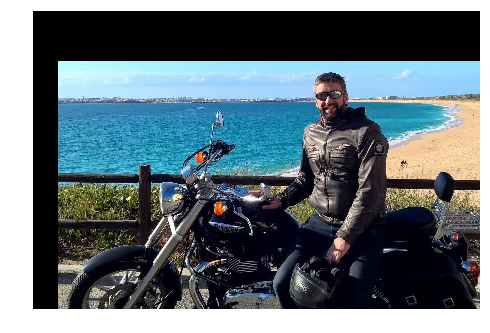

In [50]:
shifted = imutils.translate(image, 50, 100)
displayImage(shifted)

## Rotate

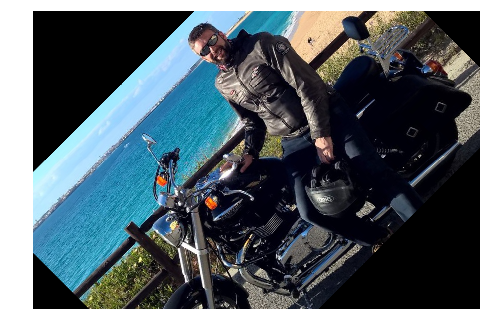

In [51]:
rotated = imutils.rotate(image, 45)
displayImage(rotated)

## Resize

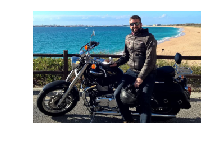

Original image size:  (600, 899, 3)
Resized image size:  (200, 299, 3)


In [52]:
resized = imutils.resize(image, height=200)
displayImage(resized, figSize=(3,3))
print('Original image size: ', image.shape)
print('Resized image size: ', resized.shape)

## Flip

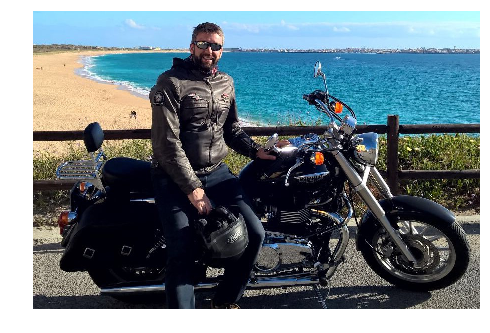

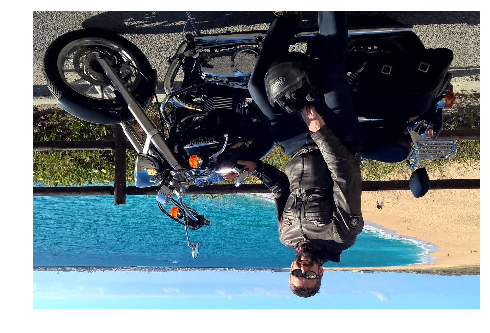

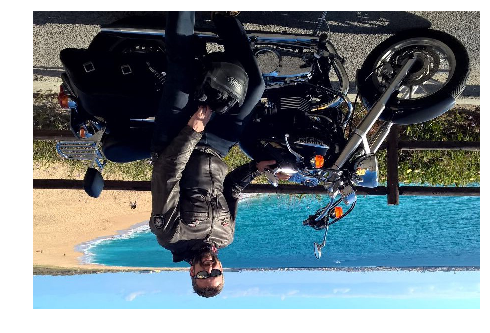

In [53]:
flipped_h = cv2.flip(image, 1)
displayImage(flipped_h)

flipped_v = cv2.flip(image, 0)
displayImage(flipped_v)

flipped_b = cv2.flip(image, -1)
displayImage(flipped_b)

## Crop

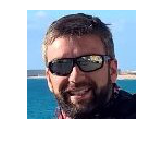

In [54]:
cropped = image[20:120, 500:600]
displayImage(cropped, figSize=(2,2))

## Ligher and Darker through arithmetic

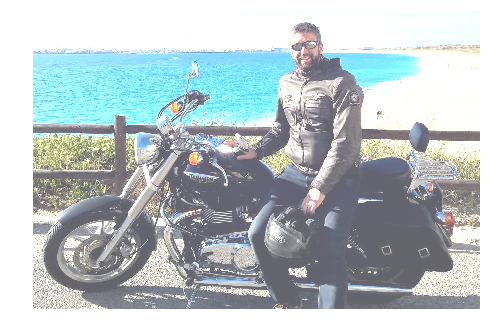

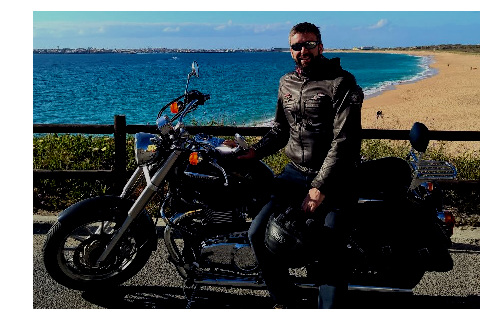

In [56]:
M = np.ones(image.shape, dtype='uint8') * 100
added = cv2.add(image, M)
displayImage(added)

M = np.ones(image.shape, dtype='uint8') * 50
subtracted = cv2.subtract(image, M)
displayImage(subtracted)

## Masking

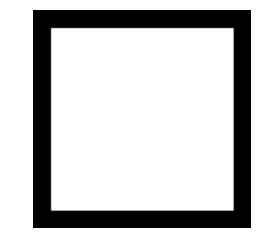

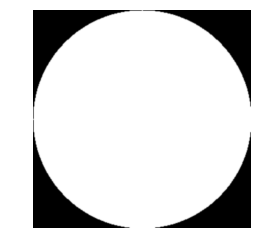

In [59]:
# First, let's draw a rectangle
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
displayImage(rectangle, shiftColor=False, figSize=(4,4))

# Secondly, let's draw a circle
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
displayImage(circle, shiftColor=False, figSize=(4,4))

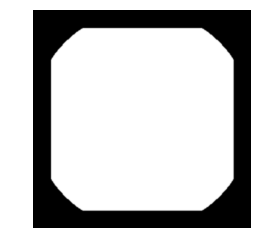

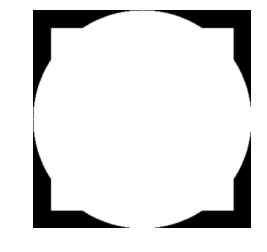

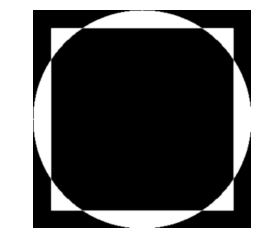

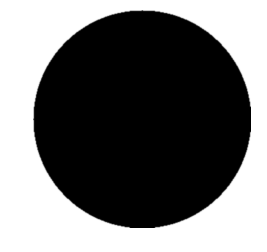

In [60]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
displayImage(bitwiseAnd, shiftColor=False, figSize=(4,4))

bitwiseOr = cv2.bitwise_or(rectangle, circle)
displayImage(bitwiseOr, shiftColor=False, figSize=(4,4))

bitwiseXor = cv2.bitwise_xor(rectangle, circle)
displayImage(bitwiseXor, shiftColor=False, figSize=(4,4))

bitwiseNot = cv2.bitwise_not(circle)
displayImage(bitwiseNot, shiftColor=False, figSize=(4,4))

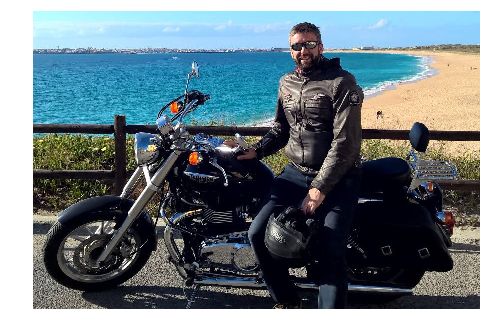

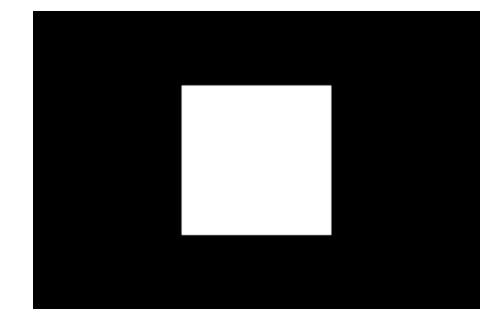

In [64]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.rectangle(mask, (cX - 150, cY - 150), (cX + 150 , cY + 150), 255, -1)
displayImage(image)
displayImage(mask, shiftColor=False)

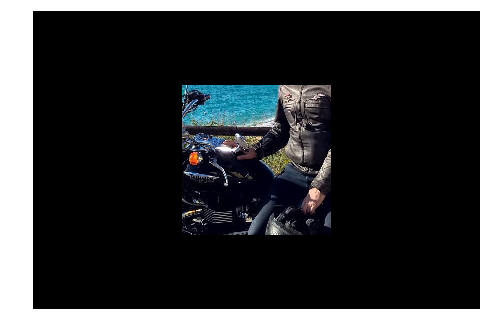

In [65]:
masked = cv2.bitwise_and(image, image, mask = mask)
displayImage(masked)

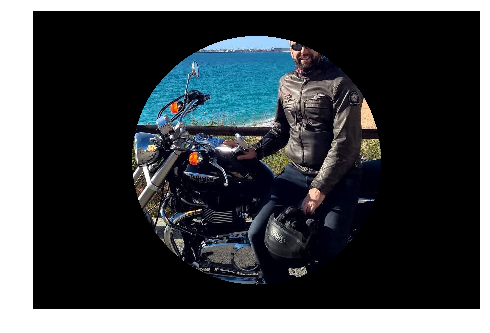

In [68]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 250, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)
displayImage(masked)

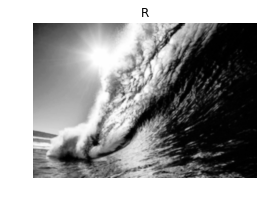

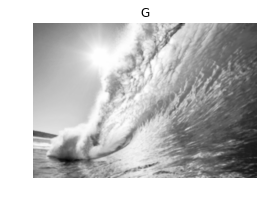

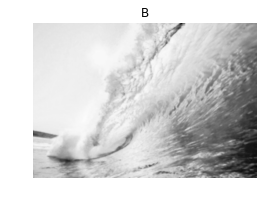

In [76]:
image = cv2.imread('images/wave.png')
(B, G, R) = cv2.split(image)

# Show each channel individually

displayImage(R, title='R', figSize=(4,4), shiftColor=False)
displayImage(G, title='G', figSize=(4,4), shiftColor=False)
displayImage(B, title='B', figSize=(4,4), shiftColor=False)

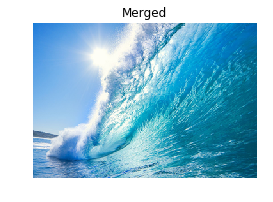

In [77]:
merged = cv2.merge([B, G, R])
displayImage(merged, title='Merged', figSize=(4,4), shiftColor=True)

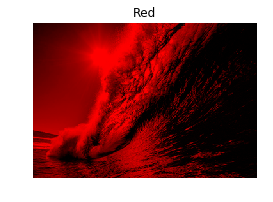

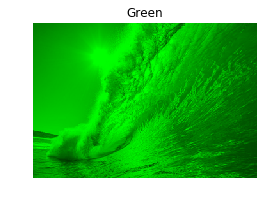

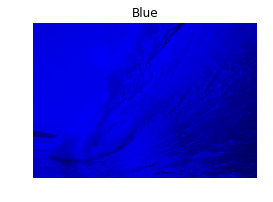

In [80]:
# Now, let's visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype = "uint8")
displayImage(cv2.merge([zeros, zeros, R]), figSize=(4,4), title = "Red")
displayImage(cv2.merge([zeros, G, zeros]), figSize=(4,4), title = "Green")
displayImage(cv2.merge([B, zeros, zeros]), figSize=(4,4), title = "Blue")